**INTRODUCCIÓN A LA REGRESIÓN LINEAL**

En este notebook revisaremos uno de los algoritmos iniciales de machine learning, el cual se basa en un modelo de regresión para una unica caracteristica.
Abordaremos el paso a paso del entrenamiento de un algoritmo de este tipo.

En primer lugar cargamos la base de datos, en este caso utilizaremos unicamente una carácteristica. Los datos relacionan la cantidad de horas de estudio con un target, que en este caso representa el puntaje total del estudiante en el parcial.

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/Auto 1')
%cd '/content/drive/MyDrive/Colab Notebooks/Auto 1'
#puede confirmar su ubiación mediante:
%ls

/content/drive/MyDrive/Colab Notebooks/Auto 1
 bmi.csv                              'Metricas de clasificacion.ipynb'
'Clasificacion cardiacas.ipynb'       'Normalization Introduction.ipynb'
 Class3and4_Operations.ipynb           Pandas_Introduction.ipynb
 cricketer.csv                        'Parcial 1'/
 Data.csv                              Perceptron_full.ipynb
 EMG-data.csv                          Perceptron.ipynb
 Final/                                RegresionLineal-MultiVariables.ipynb
 heart.csv                             RegresionLinealSimple.ipynb
 IntroductionPerceptron_simple.ipynb   Untitled0.ipynb
'Laboratorio 1'/                       Untitled1.ipynb
'Laboratorio 2'/                       Variables.ipynb
 LinearClassifiers.ipynb               Vectores_Matrices_Tensores.ipynb
 Matplotlib_introduction.ipynb


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Auto 1/Data.csv')
df=df.drop(labels='Unnamed: 0',axis=1)
df

,Horas,Puntaje
0,2.5,21
1,2.4,22
2,2.5,23
3,2.2,21
4,5.1,47
5,5.5,40
6,5.3,42
7,3.2,27
8,3.1,28
9,3.5,30


Para empezar, graficamos los datos, en este caso se usa un scatter plot con el fin de ver como se relaciona la variable independiente (Horas de estudio) con el target (Puntaje de la prueba).


Para la graficación, se hace uso de matplotlib

(29,)
(29, 1)
(29,)


Text(0, 0.5, 'y (Target) : Puntajes')

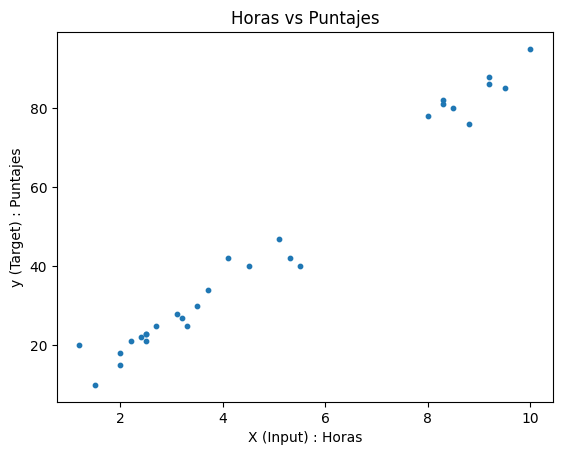

In [4]:
# Taking the Hours and Scores column of the dataframe as X and y
# respectively and coverting them to numpy arrays.
X = np.array(df['Horas'])
print(X.shape)
X = np.array(df['Horas']).reshape(-1,1)
print(X.shape)
y = np.array(df['Puntaje'])
print(y.shape)
# Plotting the data X(Hours) on x-axis and y(Scores) on y-axis
plt.scatter(X, y, s=10)
plt.title('Horas vs Puntajes')
plt.xlabel('X (Input) : Horas')
plt.ylabel('y (Target) : Puntajes')

**FUNCIÓN PARA EL ENTRENAMIENTO DEL MODELO**

In [5]:
# Training function: fit
def training(X, y, epochs):
    m, n = X.shape #Se extraen las dimensiones de los datos
    lr=0.01        #Se define la tasa de aprendizaje
    weights = np.zeros((n,1)) #Se inicializan los pesos y el bias
    bias = 0                  #Pueden ser inicializados en 0 o de forma aleatoria

    y = y.reshape(m,1) #Se hace un reshape debido a que la dimensión original
                       #es de (m,) y esto puede ocasionar inconvenientes en las operaciones
    losses = []         #Se crea una lista vacia para hacer la estimación del costo


    for epoch in range(epochs): #Bucle para el ajuste de parametros
        y_hat = np.dot(X, weights) + bias #Se hace la predicción con el w y bias inicializado
        loss = np.mean((y_hat - y)**2) #se calcula el error mediante Mean Square Error
        losses.append(loss) #Se añade el error calculado a la lista losses
        dw = (1/m)*np.dot(X.T, (y_hat - y)) #se calcula la derivada con respecto a w
        db = (1/m)*np.sum((y_hat - y)) #Se calcula la derivada con respecto al bias
        # Updating the parameters: parameter := parameter - lr*derivative
        # of loss/cost w.r.t parameter)
        weights -= lr*dw #se hace la estimación del nuevo parametro haciendo
        bias -= lr*db     #parametro= parametro - lr*derivative
    #el bucle itera el número de veces que el usuario especifique en epochs
    return weights, bias, losses #la función retorna los ultimos pesos actualizados
                                 #el bias y la lista losses que tiene el costo en cada iteración


**SE DEFINE UNA FUNCIÓN PARA PREDECIR NUEVOS VALORES**

In [6]:
def predict(X, weights, bias):  #La función recibe los datos, los pesos w y el bias
      return np.dot(X, weights) + bias  #aplica un producto punto entre los datos y el bias
                                        #y retorna una estimación

**DIVISIÓN DE DATOS**

In [15]:
X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:] #Se hace una división de datos
w, b, l  = training(X_train, y_train, epochs=100) #se entrena con los datos de entrenamiento



In [16]:
l

[2716.0,
 1236.0652210979122,
 568.1143203513687,
 266.6389919092425,
 130.5664064252463,
 69.14565709207506,
 41.41781806548624,
 28.89675323537144,
 23.239049650904523,
 20.6790452464231,
 19.51717035006932,
 18.98635203110916,
 18.740384390637004,
 18.623012927047522,
 18.563714571280105,
 18.530659723899863,
 18.50948244600101,
 18.493698734862367,
 18.480381970625068,
 18.468211100440495,
 18.45658971855853,
 18.445248477643574,
 18.434065643672167,
 18.422986106339515,
 18.411984825737246,
 18.40105033460923,
 18.390177292362267,
 18.379363124436978,
 18.368606505538672,
 18.357906675064168,
 18.347263128126418,
 18.336675476099135,
 18.326143383671443,
 18.31566654043411,
 18.305244648051094,
 18.294877414465233,
 18.284564551278734,
 18.274305772566542,
 18.2641007943365,
 18.253949334281472,
 18.243851111663044,
 18.233805847254942,
 18.223813263313257,
 18.213873083558763,
 18.203985033164756,
 18.194148838747502,
 18.184364228357712,
 18.174630931472585,
 18.164948678988242,

**GRAFICACIÓN DE LOS DATOS Y EL MODELO PREDICTIVO DE REGRESION LINEAL**

Text(0, 0.5, 'y (Target) : Puntaje')

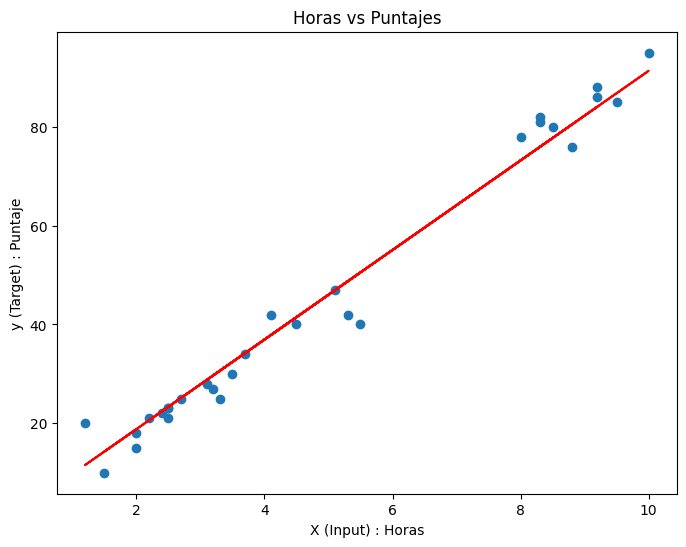

In [17]:
# Plotting our predictions.
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.plot(X, predict(X, w, b), color='red')  # X and predictions.
plt.title('Horas vs Puntajes')
plt.xlabel('X (Input) : Horas')
plt.ylabel('y (Target) : Puntaje')

In [18]:
y_test_preds = predict(X_test, w, b) #Predecir datos de entrenamiento
print(X_test)
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
print(compare)
print(np.mean(y_test-y_test_preds)**2) #calcular la función de costo en los datos de test


[[3.7]
 [9.2]
 [4.1]
 [4.5]]
   Actual            Predicted
0      34  [34.22623522027163]
1      88   [84.0942482998272]
2      42  [37.85299980787567]
3      40  [41.47976439547972]
2.517579028739936


**Graficar la función de costo a lo largo de las iteraciones de entrenamiento**

Text(0, 0.5, 'Loss / Cost')

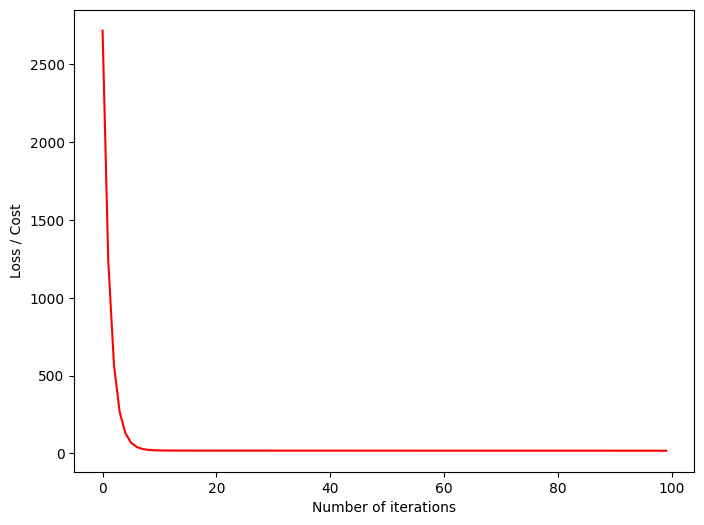

In [19]:
fig = plt.figure(figsize=(8,6))
plt.plot([i for i in range(100)], l, 'r-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss / Cost')